# National Institute of Spatial Researches

In [1]:
# Data Analysis for fire outbreaks in the Brazilian State of Mato Grosso - MT.

## Fire Outbreaks in Mato Grosso - MT , Brazil.

In [2]:
# source: https://queimadas.dgi.inpe.br/queimadas/bdqueimadas

In [3]:
import pandas as pd

df_2013 = pd.read_csv("Focos_2013-01-01_2013-12-31.csv", sep=',', header = 0)
df_2014 = pd.read_csv("Focos_2014-01-01_2014-12-31.csv", sep=',', header = 0)
df_2015 = pd.read_csv("Focos_2015-01-01_2015-12-31.csv", sep=',', header = 0)
df_2016 = pd.read_csv("Focos_2016-01-01_2016-12-31.csv", sep=',', header = 0)
df_2017 = pd.read_csv("Focos_2017-01-01_2017-12-31.csv", sep=',', header = 0)
df_2018 = pd.read_csv("Focos_2018-01-01_2018-12-31.csv", sep=',', header = 0)
df_2019 = pd.read_csv("Focos_2019-01-01_2019-12-31.csv", sep=',', header = 0)
df_2020 = pd.read_csv("Focos_2020-01-01_2020-12-31.csv", sep=',', header = 0)

# Merge Dataframes
df = pd.concat([df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020])

df.columns = ["Timestamp", "Satellite", "Country", "State", "City", 
                "Biome", "Days without rain", "Precipitation", "Risk fire",
                "Latitude", "Longitude", "FRP"] 

df.head()

,Timestamp,Satellite,Country,State,City,Biome,Days without rain,Precipitation,Risk fire,Latitude,Longitude,FRP
0,2013/10/30 16:41:00,AQUA_M-T,Brasil,MARANHAO,CODO,Cerrado,NaN,NaN,NaN,-4.639,-44.098,NaN
1,2013/10/05 16:44:00,AQUA_M-T,Brasil,BAHIA,ARACATU,Caatinga,NaN,NaN,NaN,-14.501,-41.498,NaN
2,2013/10/03 16:59:00,AQUA_M-T,Brasil,CEARA,SALITRE,Caatinga,NaN,NaN,NaN,-7.277,-40.348,NaN
3,2013/10/03 16:57:00,AQUA_M-T,Brasil,BAHIA,PIRIPA,Caatinga,NaN,NaN,NaN,-14.971,-41.703,NaN
4,2013/10/02 16:16:00,AQUA_M-T,Brasil,PIAUI,RIBEIRO GONCALVES,Cerrado,NaN,NaN,NaN,-8.040,-45.532,NaN


## Filtering by State of Mato Grosso.

In [4]:
df_MT = df["State"] == "MATO GROSSO"
df_MT = df[df_MT]

del df_MT["Days without rain"]
del df_MT["Precipitation"]
del df_MT["Risk fire"]
del df_MT["FRP"]

df_MT.head()

,Timestamp,Satellite,Country,State,City,Biome,Latitude,Longitude
58,2013/09/10 16:52:00,AQUA_M-T,Brasil,MATO GROSSO,COTRIGUACU,Amazonia,-10.028,-58.435
66,2013/08/17 17:40:00,AQUA_M-T,Brasil,MATO GROSSO,CHAPADA DOS GUIMARAES,Cerrado,-14.994,-55.583
75,2013/06/27 17:10:00,AQUA_M-T,Brasil,MATO GROSSO,NOVA MARINGA,Amazonia,-12.201,-57.567
147,2013/09/29 17:23:00,AQUA_M-T,Brasil,MATO GROSSO,MARCELANDIA,Amazonia,-11.086,-54.271
181,2013/08/15 17:54:00,AQUA_M-T,Brasil,MATO GROSSO,JUARA,Amazonia,-10.674,-57.718


## Adding Seasons.

In [5]:
import warnings
warnings.filterwarnings('ignore')

df_MT['Timestamp'] = pd.to_datetime(df_MT['Timestamp'], format='%Y-%m-%d %H:%M:%S') 

df_MT['Day'] = df_MT['Timestamp'].dt.strftime('%m%d')

dates = df_MT.loc[:,['Day']].values
dates = dates.astype(int)
d = dates[:]

i = 0
a = 0

seasons = []

for i in range(len(df_MT['Day'])):
        if (d[i] >= 101) & (d[i] < 321):
            seasons.append("Summer")
            
        if (d[i] >= 321) & (d[i] < 621):
            seasons.append("Autumn")
            
        if (d[i] >= 621) & (d[i] < 923):
            seasons.append("Winter")
            
        if (d[i] >= 923) & (d[i] < 1221):
            seasons.append("Spring")
            
        if (d[i] >= 1221) & (d[i] <= 1231):
            seasons.append("Summer")

df_MT['Seasons'] = seasons
df_MT['Month'] = df_MT['Timestamp'].dt.strftime('%m')
df_MT['Hour'] = df_MT['Timestamp'].dt.strftime('%H')
df_MT['Year'] = df_MT['Timestamp'].dt.strftime('%Y')

del df_MT['Day']

df_MT = df_MT.sort_values(by="Timestamp",ascending = True)

df_MT.head()

,Timestamp,Satellite,Country,State,City,Biome,Latitude,Longitude,Seasons,Month,Hour,Year
261,2013-01-01 18:04:00,AQUA_M-T,Brasil,MATO GROSSO,POCONE,Pantanal,-16.626,-57.258,Summer,01,18,2013
262,2013-01-01 18:04:00,AQUA_M-T,Brasil,MATO GROSSO,POCONE,Pantanal,-16.640,-57.255,Summer,01,18,2013
338,2013-01-02 17:09:00,AQUA_M-T,Brasil,MATO GROSSO,ARAGUAIANA,Cerrado,-14.864,-51.940,Summer,01,17,2013
343,2013-01-02 17:09:00,AQUA_M-T,Brasil,MATO GROSSO,SANTO ANTONIO DO LEVERGER,Pantanal,-16.647,-55.094,Summer,01,17,2013
342,2013-01-02 17:09:00,AQUA_M-T,Brasil,MATO GROSSO,NOVO SAO JOAQUIM,Cerrado,-15.225,-53.018,Summer,01,17,2013


### Fire Outbreaks increasing along the time.

In [6]:
import warnings
warnings.filterwarnings('ignore')

df_MT["count"] = 1

group_year = df_MT.groupby(['Year'])['count'].sum()
print(group_year)

df_MT_2018 = df_MT["Year"] == "2018"
df_MT_2018 = df_MT[df_MT_2018]

df_MT_2019 = df_MT["Year"] == "2019"
df_MT_2019 = df_MT[df_MT_2019]

df_MT_2020 = df_MT["Year"] == "2020"
df_MT_2020 = df_MT[df_MT_2020]

del df_MT["count"]

Year
2013    18554
2014    24955
2015    27741
2016    27305
2017    30911
2018    18032
2019    31169
2020    47708
Name: count, dtype: int64


### Visualizing Fire Outbreaks over the time.

In [7]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import spearmanr

import descartes
import geopandas as gdp
from shapely.geometry import Point, Polygon

bases_MT_2018 = [Point(xy) for xy in zip(df_MT_2018["Longitude"], df_MT_2018["Latitude"])]
geo_df2 = gdp.GeoDataFrame(df_MT_2018, geometry=bases_MT_2018)

bases_MT_2019 = [Point(xy) for xy in zip(df_MT_2019["Longitude"], df_MT_2019["Latitude"])]
geo_df3 = gdp.GeoDataFrame(df_MT_2019, geometry=bases_MT_2019)

bases_MT_2020 = [Point(xy) for xy in zip(df_MT_2020["Longitude"], df_MT_2020["Latitude"])]
geo_df4 = gdp.GeoDataFrame(df_MT_2020, geometry=bases_MT_2020)

Text(0.5, 1, 'Record of Fires in the State of Mato Grosso in 2020')

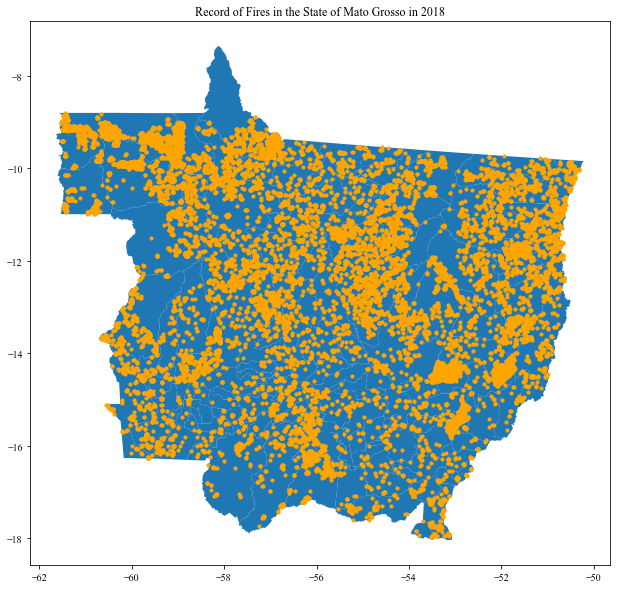

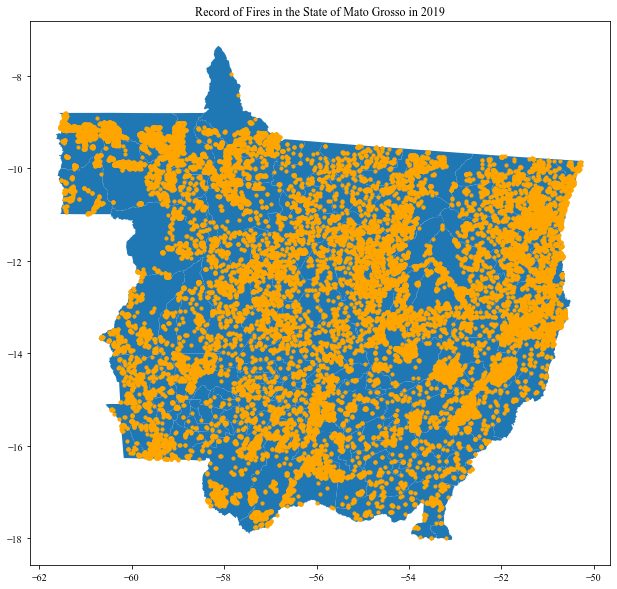

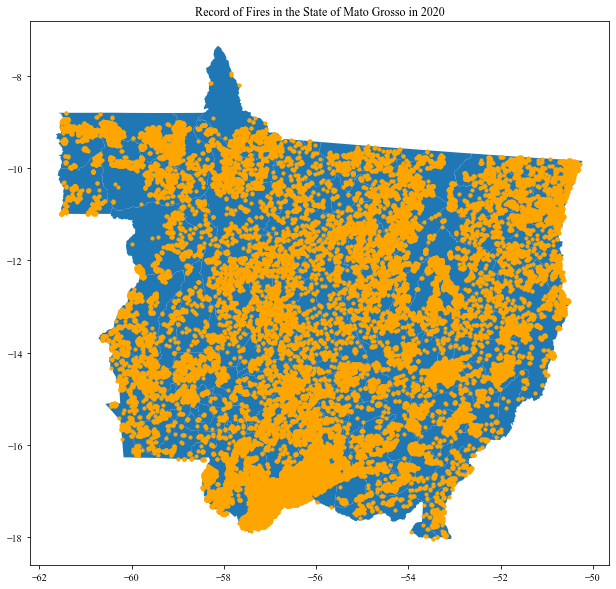

In [8]:
import pytz
import geopandas as gpd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
mapa = gpd.read_file("MT_Municipios_2021.shp")

fig, ax = plt.subplots(figsize=(15,10))
mapa.plot(ax=ax)
geo_df2.plot(ax=ax, markersize=10, color="orange")
plt.title('Record of Fires in the State of Mato Grosso in 2018')

fig, ax = plt.subplots(figsize=(15,10))
mapa.plot(ax=ax)
geo_df3.plot(ax=ax, markersize=10, color="orange")
plt.title('Record of Fires in the State of Mato Grosso in 2019')

fig, ax = plt.subplots(figsize=(15,10))
mapa.plot(ax=ax)
geo_df4.plot(ax=ax, markersize=10, color="orange")
plt.title('Record of Fires in the State of Mato Grosso in 2020')

### Visualizing Fire Outbreaks per Biome.

Biome
Amazonia    128008
Cerrado      76320
Pantanal     22047
Name: count, dtype: int64


Text(0.5, 1.0, 'Record of Fires in the State of Mato Grosso per Biome')

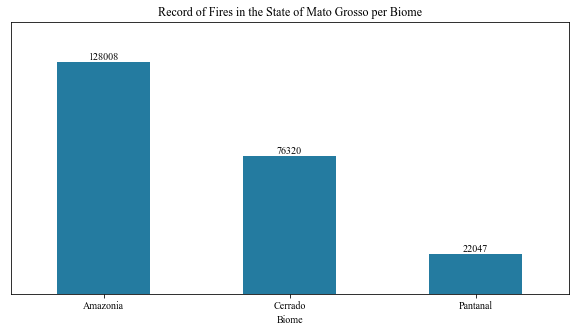

In [9]:
import matplotlib.pyplot as plt

df_MT['count'] = 1

biome_group = df_MT.groupby(['Biome'])['count'].sum()

print(biome_group.sort_values(ascending=False))

fig, ax = plt.subplots(figsize=(10,5))

ax = biome_group.plot.bar(color="#247BA0")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+1000, "{:1.0f}".format((height)), ha="center", color='black')
    
plt.xticks(rotation = 0)
plt.yticks([])

plt.ylim([0, 150000])

del df_MT['count']
    
plt.title("Record of Fires in the State of Mato Grosso per Biome")

### Visualizing Temporal Characteristics.

Text(0.5, 0.98, '\nAnalysis of Temporal Characteristics')

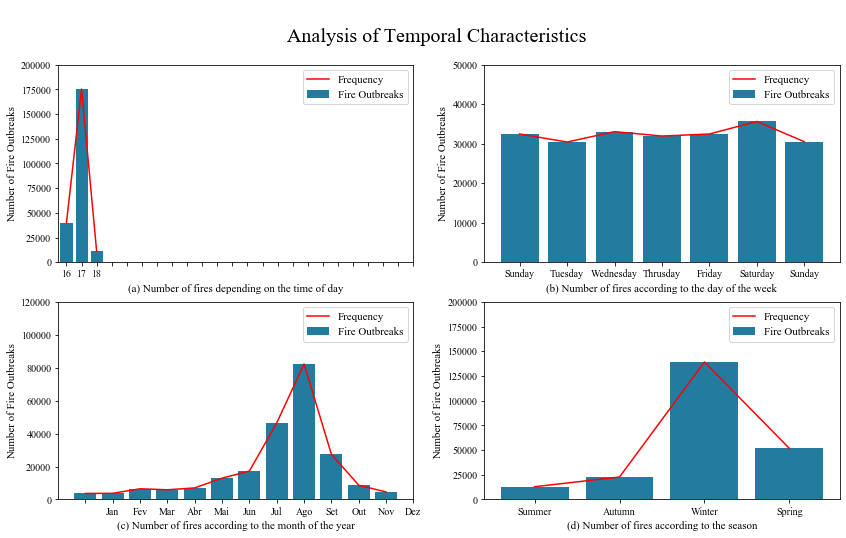

In [11]:
import pandas as pd
import statistics as sts

days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thrusday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

df_MT["Day of the Week"] = df_MT["Timestamp"].dt.dayofweek.map(days)

df_MT['count'] = 1

dates = df_MT.loc[:,['Day of the Week']].values

i = 0
day_of_the_week = []

for i in range(len(df_MT["Day of the Week"])):
       
    if (dates[i]=="Wednesday"):
            day_of_the_week.append("2")
       
    if (dates[i]=="Thrusday"):
            day_of_the_week.append("3") 
            
    if (dates[i]=="Friday"):
            day_of_the_week.append("4") 
            
    if (dates[i]=="Saturday"):
            day_of_the_week.append("5") 
            
    if (dates[i]=="Sunday"):
            day_of_the_week.append("6") 
            
    if (dates[i]=="Monday"):
            day_of_the_week.append("0")
            
    if (dates[i]=="Tuesday"):
            day_of_the_week.append("1")

df_MT['Day (Number)'] = day_of_the_week

from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'

fig, axs = plt.subplots(2, 2,figsize=(14, 8))

hour_group = df_MT.groupby(['Hour']).size()
axs[0, 0].bar(hour_group.index, hour_group, label="Fire Outbreaks", color="#247BA0")
#axs[0, 1].scatter(agrupado_hora.index, agrupado_hora, color="red")
axs[0, 0].plot(hour_group.index, hour_group, label="Frequency", color="red")
axs[0, 0].set_xticks(range(24))
axs[0, 0].set_xlabel('(a) Number of fires depending on the time of day',fontsize=11)
axs[0, 0].set_xticklabels(hour_group.index,fontsize=10)
axs[0, 0].set_ylim([0, 200000])
axs[0, 0].set_ylabel('Number of Fire Outbreaks',fontsize=11)
axs[0, 0].legend(prop={'family':'Times New Roman','size':11}, loc="upper right")

day_group = df_MT.groupby(['Day (Number)'], sort=True).size()
axs[0, 1].bar(day_group.index, day_group, label="Fire Outbreaks", color="#247BA0")
#axs[1, 1].scatter(agrupado_dia.index, agrupado_dia, color="red")
axs[0, 1].plot(day_group.index, day_group, label="Frequency", color="red")
axs[0, 1].set_xticklabels(day_group.index,fontsize=10)
axs[0, 1].set_xlabel('(b) Number of fires according to the day of the week',fontsize=11)
axs[0, 1].set_xticklabels(['Sunday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Sunday'],fontsize=10)
axs[0, 1].set_ylabel('Number of Fire Outbreaks',fontsize=11)
axs[0, 1].set_ylim([0, 50000])
axs[0, 1].legend(prop={'family':'Times New Roman','size':11}, loc="upper right")

month_group = df_MT.groupby(['Month']).size()
axs[1, 0].bar(month_group.index, month_group, label="Fire Outbreaks", color="#247BA0")
#axs[1, 0].scatter(agrupado_mes.index, agrupado_mes, color="red")
axs[1, 0].plot(month_group.index, month_group, label="Frequency", color="red")
axs[1, 0].set_xticks(range(13))
axs[1, 0].set_xticklabels(['', 'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],fontsize=10)
axs[1, 0].set_xlabel('(c) Number of fires according to the month of the year',fontsize=11)
axs[1, 0].set_ylabel('Number of Fire Outbreaks',fontsize=11)
axs[1, 0].set_ylim([0, 120000])
axs[1, 0].legend(prop={'family':'Times New Roman','size':11}, loc="upper right")
axs[1, 0].set_title(" ")

season_group = df_MT.groupby(['Seasons'], sort=False).size()
#season_group_mean = season_group.mean()
axs[1, 1].bar(season_group.index, season_group, label="Fire Outbreaks", color="#247BA0")
#axs[0, 0].scatter(agrupado_estacao.index, agrupado_estacao, color="red")
axs[1, 1].plot(season_group.index, season_group, label="Frequency", color="red")
axs[1, 1].set_xticklabels(season_group.index,fontsize=10)
axs[1, 1].set_ylabel('Number of Fire Outbreaks',fontsize=11)
axs[1, 1].set_xlabel('(d) Number of fires according to the season',fontsize=11)
axs[1, 1].set_ylim([0, 200000])
axs[1, 1].legend(prop={'family':'Times New Roman','size':11}, loc="upper right")

del df_MT['Day (Number)']
del df_MT['count']
               
plt.suptitle('\nAnalysis of Temporal Characteristics',fontsize=20)

In [12]:
df_MT.head()

,Timestamp,Satellite,Country,State,City,Biome,Latitude,Longitude,Seasons,Month,Hour,Year,Day of the Week
261,2013-01-01 18:04:00,AQUA_M-T,Brasil,MATO GROSSO,POCONE,Pantanal,-16.626,-57.258,Summer,01,18,2013,Tuesday
262,2013-01-01 18:04:00,AQUA_M-T,Brasil,MATO GROSSO,POCONE,Pantanal,-16.640,-57.255,Summer,01,18,2013,Tuesday
338,2013-01-02 17:09:00,AQUA_M-T,Brasil,MATO GROSSO,ARAGUAIANA,Cerrado,-14.864,-51.940,Summer,01,17,2013,Wednesday
343,2013-01-02 17:09:00,AQUA_M-T,Brasil,MATO GROSSO,SANTO ANTONIO DO LEVERGER,Pantanal,-16.647,-55.094,Summer,01,17,2013,Wednesday
342,2013-01-02 17:09:00,AQUA_M-T,Brasil,MATO GROSSO,NOVO SAO JOAQUIM,Cerrado,-15.225,-53.018,Summer,01,17,2013,Wednesday


In [13]:
# Salvar
df_MT.to_csv (r'National Institute of Spatial Researches.csv', sep=";", encoding='latin-1', index = False, header = True)